### MNIST Convolution Assignment

Directions: Implement a 2d convolution function to apply to MNIST dataset

In [1]:
import sklearn #machine learning library
import matplotlib.pyplot as plt #data vizualization tool
import numpy as np #machine learning framework

In [2]:
%matplotlib inline

### Loading and plotting reduced MNIST dataset

In [3]:
from sklearn.datasets import load_digits #load and return digit set from sklearn
digits = load_digits() #calling the loaded digits "digits"

In [4]:
type(digits) #the see data type of "digits" (sklearn.utils.Bunch) which is similar to a dictionary

sklearn.utils.Bunch

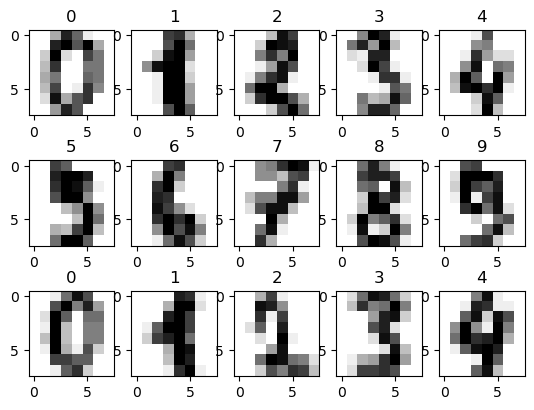

In [5]:
fig, ax = plt.subplots(3,5) #unpacking the tuple into variables (fig, ax) with 3 rows and 5 columns
ax = ax.flatten() #displays the matrix in a line ex. (1 2 3 4)
for i in range(15): #prints the first 15 integers using range() function
        im_idx = i #setting the index to "i" or the current integer the loop is on (placeholder)
        plottable_image = np.reshape(digits.data[im_idx], (8, 8)) #Reshape is 8x8 as it is a reduced dataset
        ax[i].imshow(plottable_image, cmap='gray_r') #plotting grayscale image witn inverted colors on the i-th subplot axes
        ax[i].set_title(digits.target[im_idx]) #setting the title to the current integer

### Loading the full MNIST dataset from OpenML via SKLearn

In [6]:
from sklearn.datasets import fetch_openml #pulling in openml
mnist = fetch_openml('mnist_784') #selecting the MNIST_784 dataset

In [7]:
type(mnist.data) #taking a look at the data type of the MNIST dataset (a pandas dataframe)

pandas.core.frame.DataFrame

In [8]:
mnist.data #displays 70000 rows and 784 columns

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


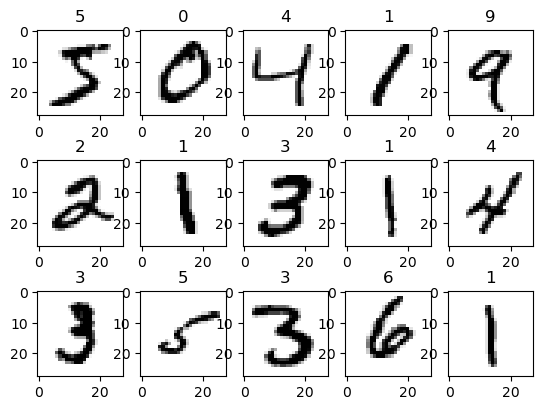

In [9]:
fig, ax = plt.subplots(3,5) #unpacking into variables (fig, ax) with 3 rows and 5 columns
ax = ax.flatten() #displays the matrix in a line ex. (1 2 3 4)
for i in range(15): #prints the first 15 integers using range() function
    im_idx = i #setting the index to "i" or the current integer the loop is on (placeholder)
    plottable_image = np.reshape(list(mnist.data.iloc[im_idx]),(28,28)) #Reshape is 28x28 is a full dataset
    ax[i].imshow(plottable_image,cmap='gray_r') #plotting grayscale image witn inverted colors on the i-th subplot axes
    ax[i].set_title(mnist.target[im_idx]) #setting the title to the current integer

### Asssignment - Implement A 2D Convolution Function

In [10]:
def convolve2D(image, kernel, padding=0, strides=1): #performs Fourier-based convolution of an image file using the 2D kernel
    #padding=0 ensures that the size of the output is equal to the size of the input by padding the edges with "fake pixels"
    #stride=1 picking slides a pixel apart - number of pixels skipped
    #Cross Correlation
    kernel = np.flipud(np.fliplr(kernel)) #cross correlation - the kernel needs to be inverted before applying
    
    #Get The Shapes Of Kernel + Image + Padding
    xKernShape = kernel.shape[0] #number of rows in the kernel
    yKernShape = kernel.shape[1] #number of columns in the kernel
    xImgShape = image.shape[0] #number of rows in the input image
    yImgShape = image.shape[1] #number of columns in the input image
    
    #Shape Of The Output Convolution
    #Dividing by stride gives the number of times the kernel can be applied along rows
    #Adding 1 gives total number of rows in the output
    xOutput = int(((xImgShape-xKernShape + 2 * padding) / strides) + 1) #subtract num rows in input image by num rows in kernel +2 *0 and adding 1
    yOutput = int(((yImgShape-yKernShape + 2 * padding) / strides) + 1) #subtract num columns in input image by num columns in kernel +2 *0 and adding 1
    output = np.zeros((xOutput, yOutput)) #create new matrix with reduced dimensions
        
    #Apply Equal Padding To All Sides  
    if padding != 0: #if padding == 0, then the code will be executed, if padding=0 it will not run
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2)) #create new arrays with zeroes with padded dimensions
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image #replace inner portion of the image with real image
        print(imagePadded)
    else: 
        imagePadded = image #include else statement incase there isn't any padding, making padded image equal to image

    #Iterate (Repeat) Through the Image
    for y in range(image.shape[1]): #create loop to go through all "y" dimensions
    #Exit The Convolution
        if y > image.shape[1]-yKernShape: #create a break to see if we are at the end of the image in the "y" dimension or LEFT of the image
            break
    #Only Convolve If "y" Has Gone Down By The Specific Strides
        if y % strides == 0: #if the remainder of y/strides = 0, then for loop is executed. If it's not zero, the program will go to next line of code
            for x in range(image.shape[0]): #create loop to go through all "x" dimensions
    #Go To Next Row Once Kernel is Out Of Bounds
                if x > image.shape[0]-xKernShape: #create a break to see if we are at the end of the image in the "x" dimension or RIGHT of the image
                    break
                try: 
    #Only Convolve If "x" Has Moved By The Specified Strides
                   if x % strides == 0: #if the remainder of y/strides = 0, then for loop is executed. If it's not zero, the program will go to next line of code
                      output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum() #convolution that sums the elements and appends it to the output matrix
                except: 
                   break
    return output #return the output!

### Horizontal Edge Detection (Kernel/Filter)

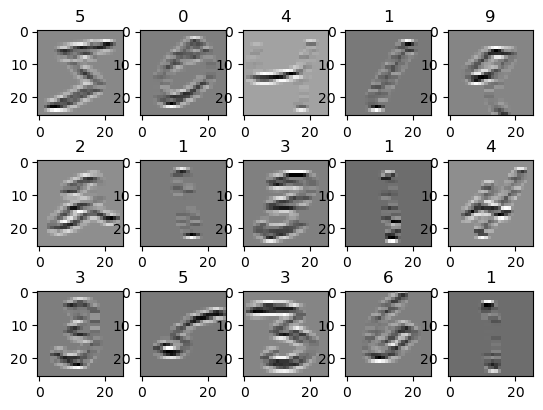

In [11]:
kernel = np.array([[-1, -1, -1], #Plotting the digits
                   [2, 2, 2], 
                   [-1, -1, -1]])

fig, ax = plt.subplots(3,5) #unpacking into variables (fig, ax) with 3 rows and 5 columns
ax = ax.flatten() #displays the matrix in a line ex. (1 2 3 4)
for i in range(15): #prints the first 15 integers using range() function
    im_idx = i #setting the index to "i" or the current integer the loop is on (placeholder)
    plottable_image = np.reshape(list(mnist.data.iloc[im_idx]), (28, 28)) #Reshape is 28x28 is a full dataset
    
    convolution = convolve2D(plottable_image, kernel) #Applying the kernel
    ax[i].imshow(convolution, cmap='gray_r') #plotting grayscale image witn inverted colors on the i-th subplot axes
    ax[i].set_title(mnist.target[im_idx]) #setting the title to the current integer

### Vertical Edge Detection

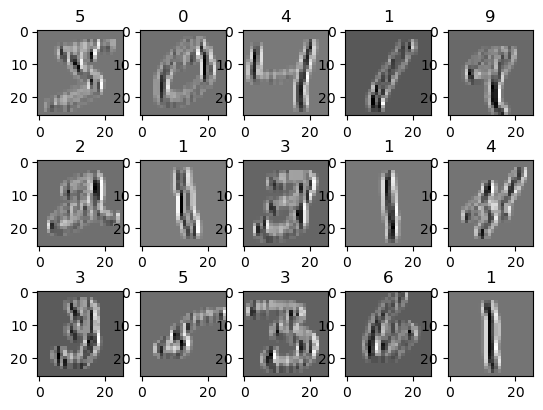

In [12]:
kernel = np.array ([[-1, 2, -2], #plotting the digits
                    [-1, 2, -1],
                    [-1, 2, -1]])

fig, ax = plt.subplots(3,5)
ax = ax.flatten()
for i in range(15):
        im_idx = i
        plottable_image = np.reshape(list(mnist.data.iloc[im_idx]), (28,28))
        
        convolution = convolve2D(plottable_image, kernel)
        ax[i].imshow(convolution, cmap='gray_r')
        ax[i].set_title(mnist.target[im_idx])

### Edge Detection Kernel

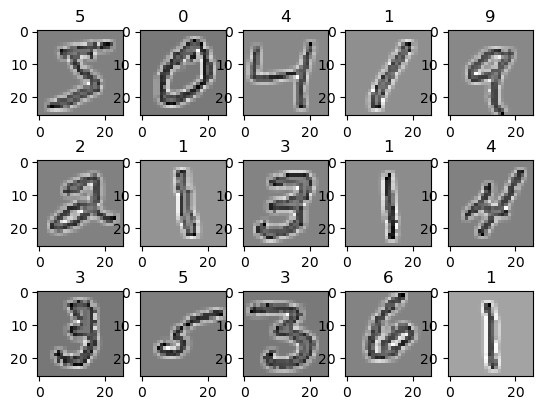

In [13]:
kernel = np.array([[-1, -1,-1], #plotting the digits
                   [-1, 8, -1],
                   [-1, -1, -1]])

fig, ax = plt.subplots(3,5)
ax = ax.flatten()
for i in range(15):
    im_idx = i
    plottable_image = np.reshape(list(mnist.data.iloc[im_idx]), (28,28))
    
    convolution = convolve2D(plottable_image, kernel)
    ax[i].imshow(convolution, cmap='gray_r')
    ax[i].set_title(mnist.target[im_idx])

### Loading an image and apply convolution filters to them

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('Image.jpg')

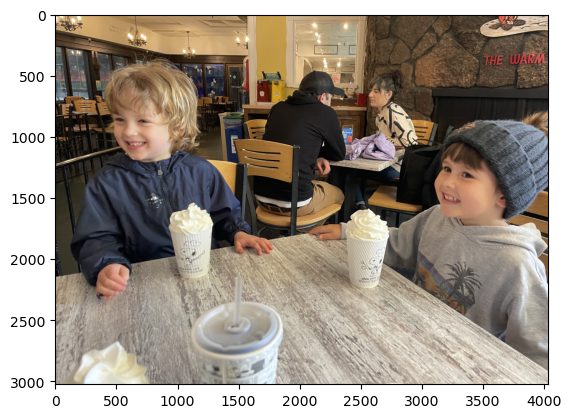

In [15]:
imgplot = plt.imshow(img)

### Horizontal Edge Detection Kernel

In [105]:
if __name__ == '__main__':
    # Load RGB Image
    image = cv2.imread('Image.jpg')
    
    # Convert to Grayscale
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    #Horizontal Edge Detection Kernel
    kernel = np.array([[-1, -1,-1],
                       [2, 2, 2],
                       [-1, -1, -1]])

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    
    # Save Output
    cv2.imwrite('2DConvolved_Horizontal.jpg', output)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 173. ...  69.   0.   0.]
 ...
 [  0.   0. 126. ... 212.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [106]:
img_1=mpimg.imread('2DConvolved_Horizontal.jpg')

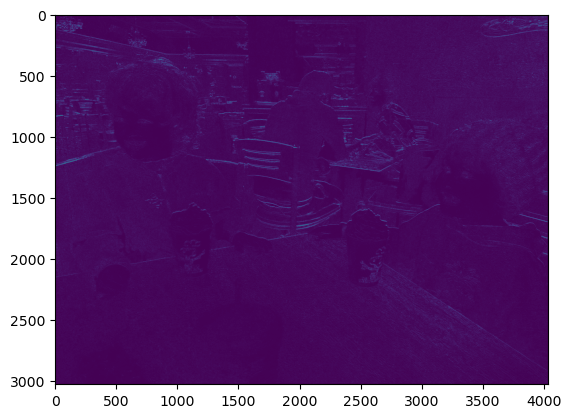

In [107]:
imgplot = plt.imshow(img_1)

### Vertical Edge Detection

In [108]:
if __name__ == '__main__':
    # Load RGB Image
    image = cv2.imread('Image.jpg')
    
    # Convert to Grayscale
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    #Vertical Edge Detection Kernel
    kernel = np.array ([[-1, 2, -2],
                        [-1, 2, -1],
                        [-1, 2, -1]])
    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    
    # Save Output
    cv2.imwrite('2DConvolved_Vertical.jpg', output)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 173. ...  69.   0.   0.]
 ...
 [  0.   0. 126. ... 212.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [109]:
img_2=mpimg.imread('2DConvolved_Vertical.jpg')

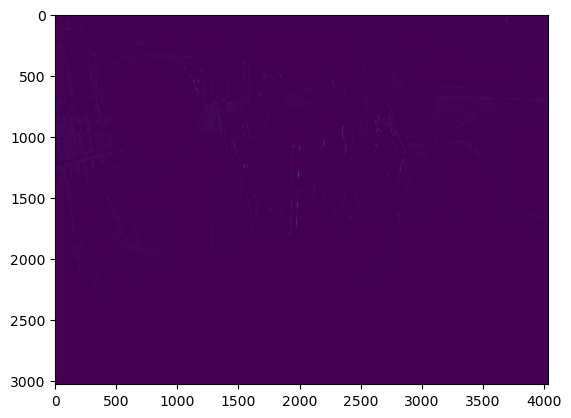

In [110]:
imgplot = plt.imshow(img_2)

### Edge Detection Kernel

In [111]:
if __name__ == '__main__':
    # Load RGB Image
    image = cv2.imread('Image.jpg')
    
    # Convert to Grayscale
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    #Edge Detection Kernel
    kernel = np.array([[-1, -1,-1],
                       [-1, 8, -1],
                       [-1, -1, -1]])
    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    
    # Save Output
    cv2.imwrite('2DConvolved_Edge.jpg', output)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 173. ...  69.   0.   0.]
 ...
 [  0.   0. 126. ... 212.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [112]:
img_3=mpimg.imread('2DConvolved_Edge.jpg')

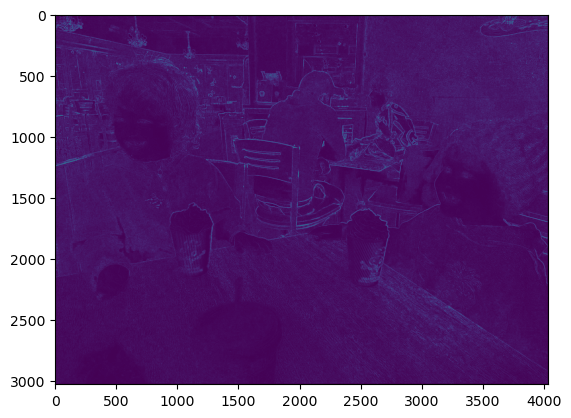

In [113]:
imgplot = plt.imshow(img_3)